In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests

In [102]:
df=pd.read_csv('E:/A Python/Practic Data/A gurgaon/grgn_clean.csv')

In [110]:
df.to_csv('E:/A Python/Practic Data/A gurgaon/grgn_clean.csv',index=False )

In [160]:
df_new.to_csv('E:/A Python/Practic Data/A gurgaon/grgn_imputation_clean.csv',index=False )

In [4]:
pd.set_option('display.max_rows',400)
pd.set_option('display.max_column',None)
pd.set_option('display.max_colwidth',200)

In [5]:
df.head(3)

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
0,flat,apna enclave,sector 3,0.55,950.0,5789.0,Super Built up area 950(88...,2,2,2,2.0,North-East,old property,950.0,NaN,744.0,0,0,0,0,0,0,74
1,flat,ats tourmaline,sector 109,1.75,2150.0,8139.0,Super Built up area 2150(1...,3,4,3+,9.0,North-East,relatively new,2150.0,NaN,NaN,1,0,0,0,0,0,131
2,flat,smart world orchard,sector 61,2.20,1549.0,14202.0,Carpet area: 1549 (143.91 ...,3,3,2,4.0,North,new property,NaN,NaN,1549.0,0,0,0,0,0,0,180


In [6]:
extra_sectors_naming = {
    '46b': 'sector 46b',
    'dharam colony': 'sector 12',
    'krishna colony': 'sector 7',
    'suncity': 'sector 54',
    'prem nagar': 'sector 13',
    'mg road': 'sector 28',
    'gandhi nagar': 'sector 28'
}

In [26]:
import re
def zfill_(match: re.Match[str]):
    return match.group(1).zfill(3)

In [28]:
import re

# Define a regular expression pattern with a capture group
pattern = r'(\d+)'

# Create a match object by searching for the pattern in a string
text = "Number: 7"
match = re.search(pattern, text)
print(match)
if match:
    # Call the zfill_ function to pad the captured group with leading zeros
    padded_result = zfill_(match)
    print(padded_result)  # Output: "007"


<re.Match object; span=(8, 9), match='7'>
007


In [25]:
df.sector.replace(extra_sectors_naming).str.replace(r'(\d+)', zfill_)#.extract(r'(\d+)')

C:\Users\mayan\AppData\Local\Temp\ipykernel_5008\2111451696.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.sector.replace(extra_sectors_naming).str.replace(r'(\d+)', zfill_)#.extract(r'(\d+)')


0         sector 3
1       sector 109
2        sector 61
3         sector 2
4       sector 63a
5       sector 37d
6        sector 80
7        sector 90
8       sector 106
9        sector 24
10       sector 85
11      sector 108
12       sector 84
13       sector 63
14       sector 69
15        sector 4
16       sector 85
17        sector 4
18       sector 33
19       sector 69
20       sector 86
21       sector 92
22       sector 49
23       sector 38
24       sector 43
25       sector 46
26       sector 30
27       sector 79
28       sector 67
29       sector 81
30       sector 56
31       sector 66
32       sector 84
33       sector 86
34       sector 79
35       sector 90
36       sector 90
37       sector 36
38      sector 88a
39       sector 22
40       sector 86
41       sector 33
42       sector 68
43       sector 83
44        sector 4
45       sector 33
46      sector 37d
47       sector 81
48       sector 69
49      sector 99a
50       sector 65
51       sector 48
52       sec

# Property Type

<AxesSubplot:>

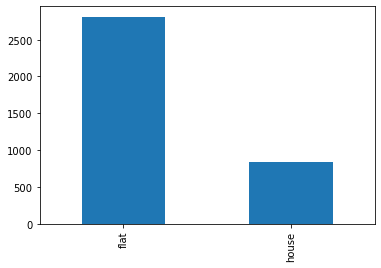

In [31]:
df.property_type.value_counts().plot(kind='bar')

* plot count

In [41]:
society_count=df.society.value_counts()

In [46]:
(society_count>100).sum()

1

In [55]:

df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.023644
ss the leaf                             0.046658
dlf new town heights                    0.059899
shapoorji pallonji joyville gurugram    0.073140
signature global park                   0.084174
shree vardhman victoria                 0.094893
smart world orchard                     0.104981
emaar mgf emerald floors premier        0.115069
dlf the ultima                          0.124842
paras dews                              0.134615
m3m woodshire                           0.144073
dlf regal gardens                       0.153531
shree vardhman flora                    0.162673
la vida by tata housing                 0.171501
smart world gems                        0.180328
godrej nature plus                      0.188840
signature global solera                 0.197352
bptp terra                              0.205233
experion the heartsong                  0.212799
tata primanti                           0.220366
vatika gurgaon      

In [51]:
frequency_bins ={
    'very high > 100':(society_count>100).sum(),
    'high (50-100)':((society_count>=50)&(society_count<=100)).sum(),
    'average (10-59)':((society_count>=10)&(society_count<=49)).sum(),
    'low (1-10)':((society_count<10)&(society_count>1)).sum(),
    'very low = 1':(society_count==1).sum(),
}
frequency_bins

{'very high > 100': 1,
 'high (50-100)': 2,
 'average (10-59)': 92,
 'low (1-10)': 272,
 'very low = 1': 302}

<AxesSubplot:>

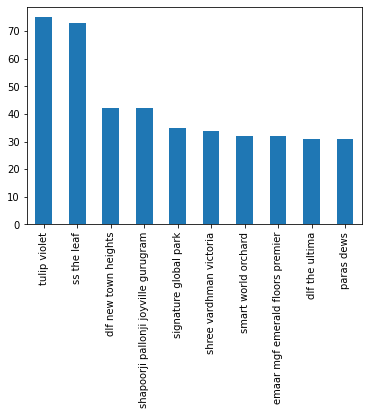

In [56]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [3]:
df.head(2)

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
0,flat,apna enclave,sector 3,0.55,950.0,5789.0,Super Built up area 950(88.26 sq.m.)Built Up a...,2,2,2,...,950.0,NaN,744.0,0,0,0,0,0,0,74
1,flat,ats tourmaline,sector 109,1.75,2150.0,8139.0,Super Built up area 2150(199.74 sq.m.),3,4,3+,...,2150.0,NaN,NaN,1,0,0,0,0,0,131


<AxesSubplot:>

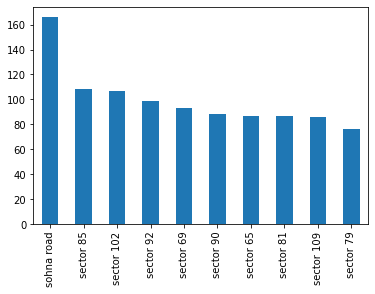

In [5]:
df.sector.value_counts().head(10).plot(kind='bar')

In [14]:
df.sector.value_counts().head(40).sum()

2591

In [17]:
df.sector.value_counts()

sohna road           166
sector 85            108
sector 102           107
sector 92             99
sector 69             93
sector 90             88
sector 65             87
sector 81             87
sector 109            86
sector 79             76
sector 104            69
sector 83             68
sector 33             67
sector 2              67
sector 43             65
sector 86             64
sector 37d            63
sector 50             63
sector 107            60
sector 108            58
sector 89             57
sector 56             56
sector 48             55
sector 70a            54
sector 95             54
sector 37c            51
sector 26             50
sector 70             50
sector 84             49
sector 49             48
sector 4              48
sector 67             47
sector 113            43
sector 28             43
sector 66             42
sector 103            42
sector 82             41
sector 61             41
sector 25             40
sector 7              39


In [27]:
df['price'].isnull().sum()

0

In [25]:
df.price.quantile([.25,0.5,.75,.95,.99])

0.25     0.950
0.50     1.540
0.75     2.750
0.95     8.500
0.99    15.304
Name: price, dtype: float64

In [24]:
df.price.describe()['25%']

0.95

In [28]:
df.price.describe()

count    3650.000000
mean        2.537600
std         2.983252
min         0.070000
25%         0.950000
50%         1.540000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

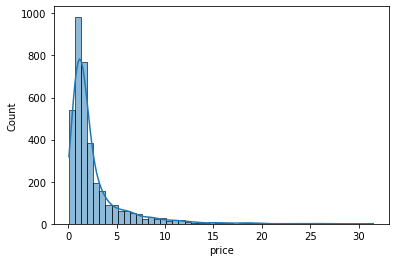

In [33]:
sns.histplot(df.price,kde=True,bins=50)

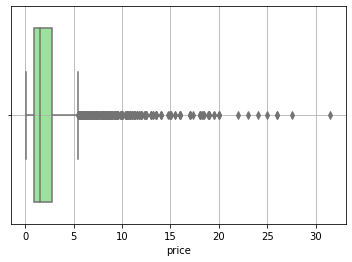

In [34]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [35]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2760669778407863 14.90157908945529


In [41]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

print('\n',Q1,'\n',Q3,'\n',IQR)


 0.95 
 2.75 
 1.8


In [42]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [43]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [45]:
outliers['price'].describe() 

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

<AxesSubplot:>

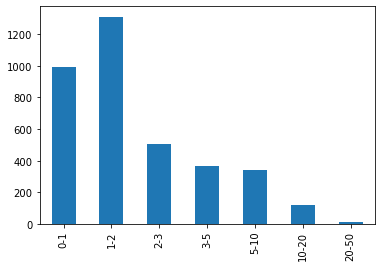

In [55]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

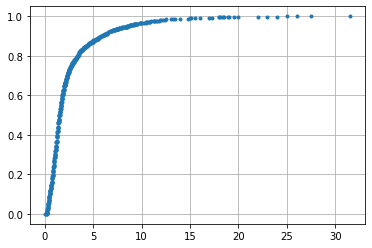

In [68]:
ecdf =df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index,ecdf,marker='.',linestyle='none')
plt.grid()

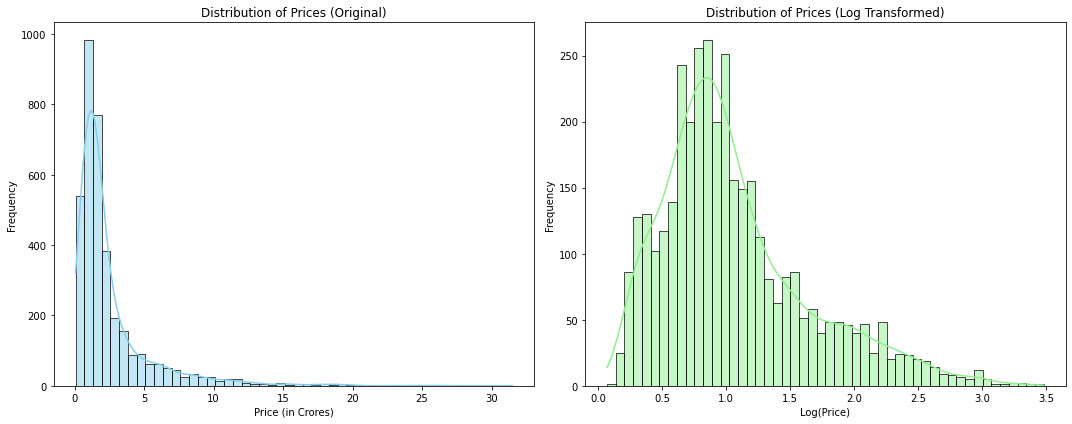

In [72]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


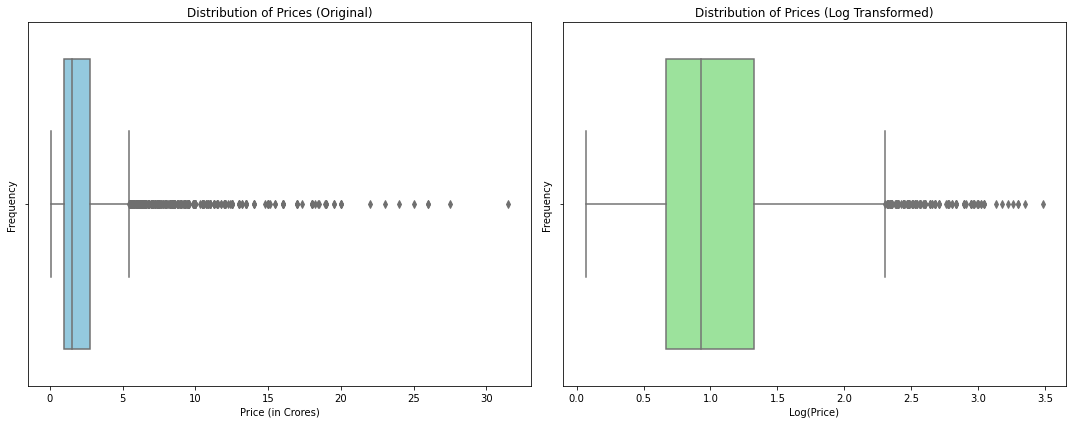

In [73]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

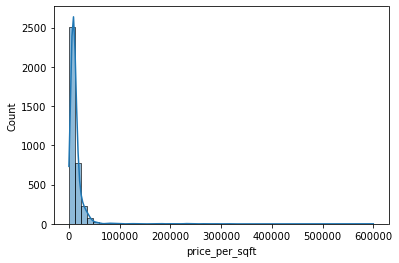

In [79]:
sns.histplot(df.price_per_sqft,bins=50,kde=True)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

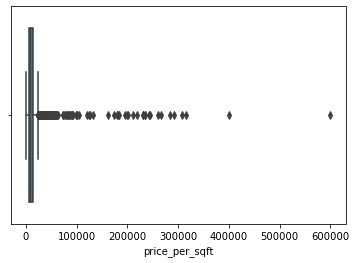

In [82]:
sns.boxplot(df.price_per_sqft)

In [80]:
df.price_per_sqft.describe()

count      3650.000000
mean      13910.558356
std       23238.900939
min           4.000000
25%        6825.000000
50%        9022.000000
75%       13888.750000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [85]:
df.price_per_sqft.value_counts().head(10)

10000.0    26
8000.0     19
5000.0     17
12500.0    14
6666.0     13
22222.0    13
11111.0    13
8333.0     12
7500.0     12
6000.0     11
Name: price_per_sqft, dtype: int64

In [5]:
df.bedRoom.describe()

count    3650.000000
mean        3.348219
std         1.881413
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

<AxesSubplot:>

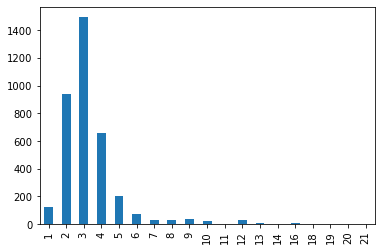

In [17]:
df.bedRoom.value_counts().sort_index().plot(kind='bar')

<AxesSubplot:xlabel='bedRoom', ylabel='Count'>

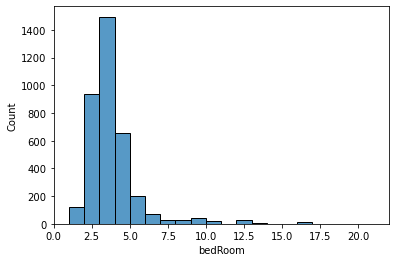

In [16]:
sns.histplot(df.bedRoom,bins=20)

<AxesSubplot:ylabel='bedRoom'>

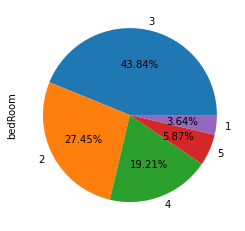

In [24]:
df.bedRoom.value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

<AxesSubplot:>

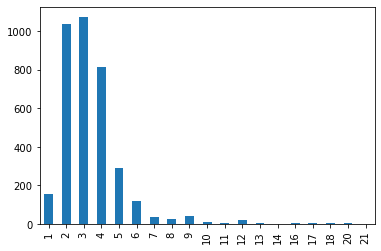

In [25]:
df.bathroom.value_counts().sort_index().plot(kind='bar')

<AxesSubplot:ylabel='bathroom'>

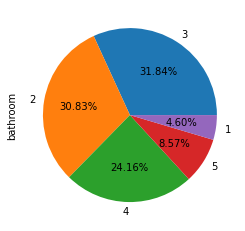

In [26]:
df.bathroom.value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [30]:
df.head(1)

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
0,flat,apna enclave,sector 3,0.55,950.0,5789.0,Super Built up area 950(88...,2,2,2,2.0,North-East,old property,950.0,NaN,744.0,0,0,0,0,0,0,74


<AxesSubplot:ylabel='balcony'>

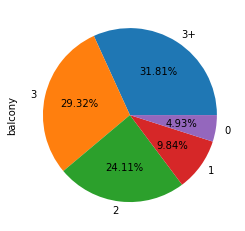

In [33]:
df.balcony.value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

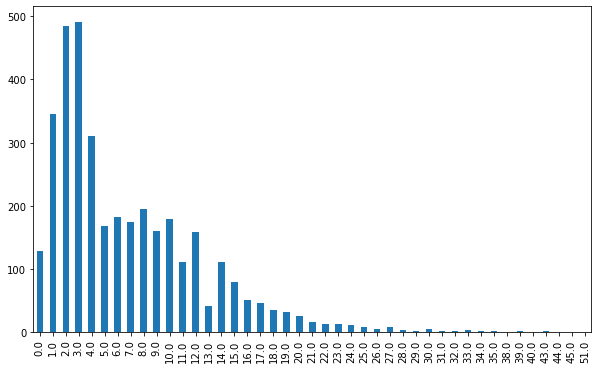

In [35]:
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
df.floorNum.value_counts().sort_index().plot(kind='bar')
plt.show()

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='floorNum'>

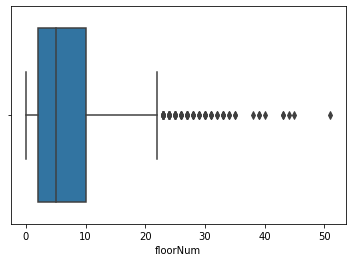

In [36]:
sns.boxplot(df.floorNum)

In [37]:
df.facing.fillna('NA',inplace=True)

In [38]:
df.facing.value_counts()

NA            1031
North-East     620
East           619
North          386
West           247
South          231
North-West     192
South-East     171
South-West     153
Name: facing, dtype: int64

In [39]:
df.agePossession.value_counts()

relatively new        1638
new property           589
moderately old         556
undefined              304
old property           300
under construction     263
Name: agePossession, dtype: int64

In [41]:
df.super_built_up_area.describe()

count     1873.000000
mean      1925.704511
std        764.388593
min         89.000000
25%       1480.000000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<AxesSubplot:xlabel='super_built_up_area', ylabel='Count'>

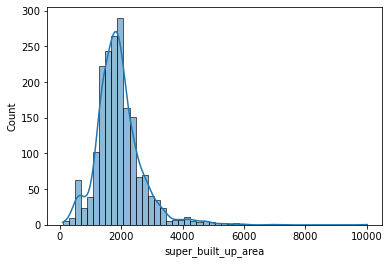

In [45]:
sns.histplot(df.super_built_up_area,bins=50,kde=True)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='super_built_up_area'>

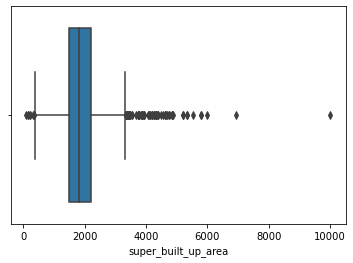

In [46]:
sns.boxplot(df.super_built_up_area)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area'>

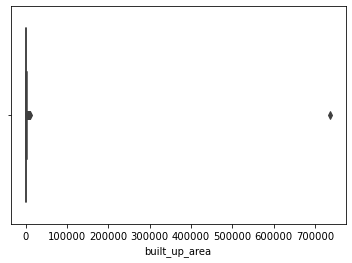

In [47]:
sns.boxplot(df.built_up_area)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carpet_area'>

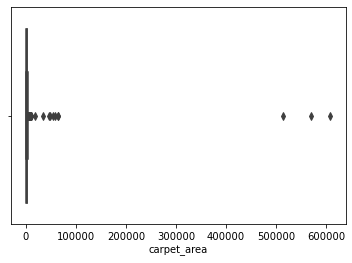

In [48]:
sns.boxplot(df.carpet_area)

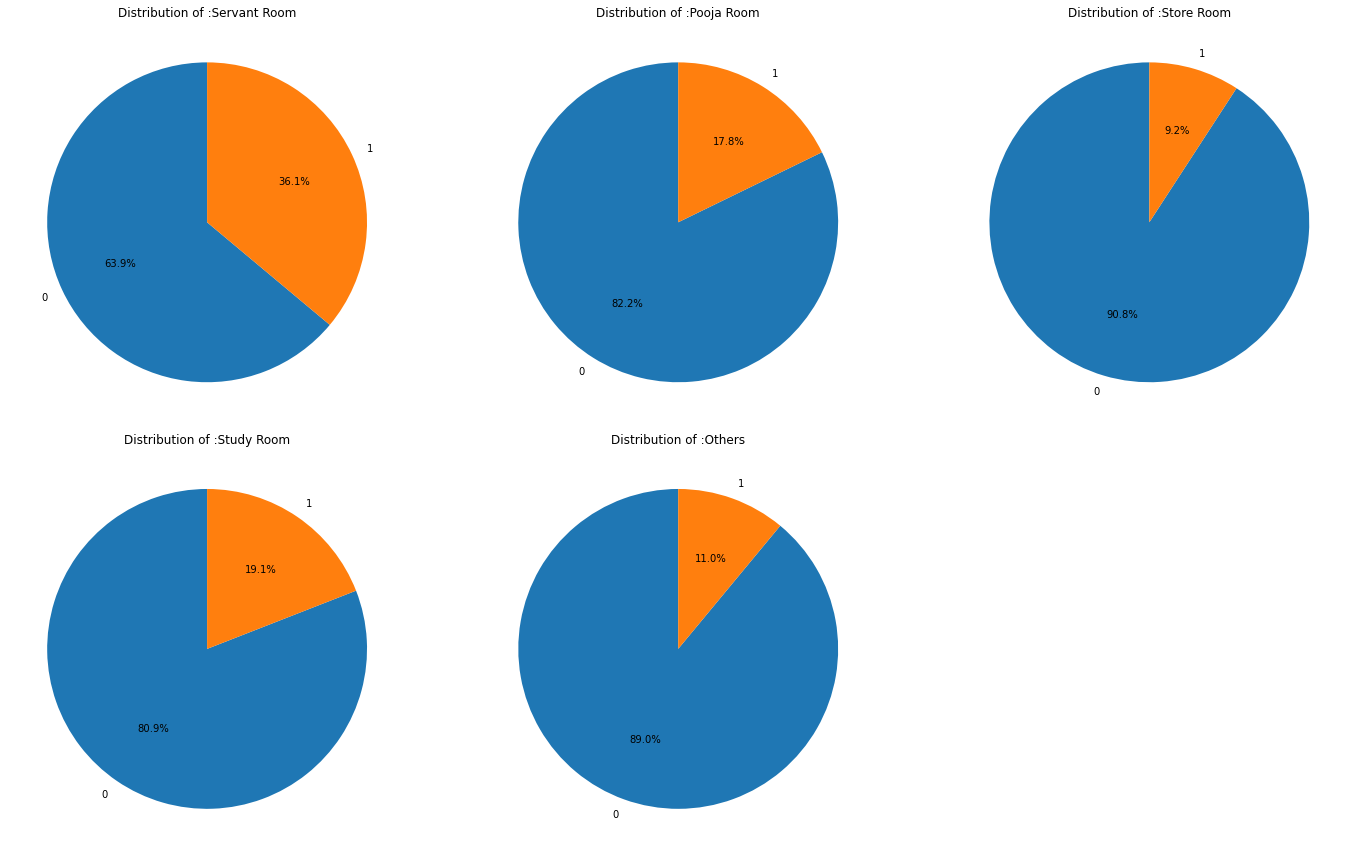

In [65]:
plt.figure(figsize=(20,12))

for idx,room in enumerate(['servant room', 'pooja room', 'store room', 'study room','others'],1):
    ax = plt.subplot(2,3,idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%',startangle=90,ax=ax)
    plt.title(f'Distribution of :{room.title()}')
    plt.ylabel('')
plt.tight_layout()    
plt.show()

In [66]:
df.furnishing_type.value_counts()

0    2418
1    1031
2     201
Name: furnishing_type, dtype: int64

<AxesSubplot:ylabel='furnishing_type'>

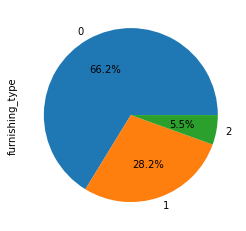

In [68]:
df.furnishing_type.value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:xlabel='luxury_score', ylabel='Count'>

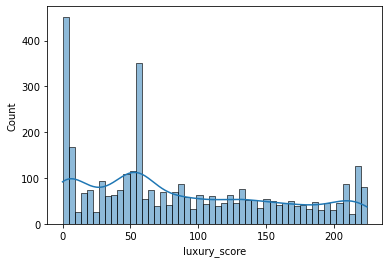

In [71]:
sns.histplot(df.luxury_score,bins=50,kde=True)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score'>

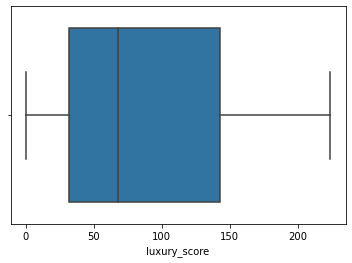

In [72]:
sns.boxplot(df.luxury_score)

In [73]:
!pip install pandas-profiling

In [80]:
from pandas_profiling import ProfileReport

dd = pd.read_csv('E:/A Python/Practic Data/grgn_all_clean.csv')

profile = ProfileReport(dd,title='pandas profiling report',explorative=True)

profile.to_file('output_report.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [81]:
df.head(1)

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
0,flat,apna enclave,sector 3,0.55,950.0,5789.0,Super Built up area 950(88...,2,2,2,2.0,North-East,old property,950.0,NaN,744.0,0,0,0,0,0,0,74


In [85]:
def built_up(text,area_type):
    match = re.search(area_type+ r'\s*:\s*(\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    return None

In [86]:
def convert_sqft(text,area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value),text)
    if match:
        sqm = float(match.group(1))
        return sqm*10.7639 # conversion sq_m to sq_ft
    return area_value

In [137]:
def plot_and_build_up_area(text,area_type):
    match = re.search(r'plot area (\d+\.?\d*)',text)
    match1 = re.search(area_type+ r'\s*:\s*(\d+\.?\d*)',text)
    if match:
        return float(match.group(1))
    if match1:
        return float(match1.group(1))
    return None

In [109]:
df['built_up_area']=df.areawithtype.apply(lambda x : built_up(x,'built up area'))
#df['built_up_area']=df.apply(lambda x: convert_sqft(x['areawithtype'],x['built_up_area']),axis=1)

df['built_up_area']=df.areawithtype.apply(plot_area)
#df['built_up_area']=df.apply(lambda x: convert_sqft(x['areawithtype'],x['built_up_area']),axis=1)

In [140]:
df.built_up_area=df.areawithtype.apply(lambda x : plot_and_build_up_area(x,'built up area'))
df['built_up_area']=df.apply(lambda x: convert_sqft(x['areawithtype'],x['built_up_area']),axis=1)
#df.built_up_area=df.areawithtype.apply(plot_area)

In [119]:
#df.head(16)

In [158]:
df.apply(lambda x: convert_sqft(x['areawithtype'],x['built_up_area']),axis=1)

0        900.000000
8        940.000000
9       3000.000000
10      1660.000000
13      2700.000000
15       500.000000
17       160.000000
18       550.000000
22       232.000000
23       100.000000
24      2801.000000
25       102.000000
26      2367.000000
30       161.000000
31      3500.000000
33      1500.000000
34      1300.000000
39      1200.000000
43      1350.000000
44       117.000000
46      2100.000000
47      1750.000000
54      1385.000000
56       597.000000
60      1900.000000
61      1550.000000
65      1091.000000
67       610.000000
68       360.000000
69      3000.000000
70      1081.000000
72      1075.000000
80       189.000000
81      1615.000000
82      7000.000000
83       161.000000
84      1600.000000
85      1050.000000
88      2105.000000
90      1285.000000
98      1433.000000
100     2625.000000
101     1500.000000
103     1081.000000
106      100.000000
110     1730.000000
113      750.000000
114      100.000000
115       75.000000
118      292.000000


In [122]:
df.areawithtype=df.areawithtype.str.lower()

In [111]:
df[(df.areawithtype.str.contains('plot area'))|(df.areawithtype.str.contains('built up area'))&(df.built_up_area.isna())][['areawithtype','super_built_up_area','built_up_area']]#.shape#&(~(df.areawithtype.str.contains('Super Built up area')))

,areawithtype,super_built_up_area,built_up_area
0,super built up area 950(88.26 sq.m.)built up area: 900 sq.ft. (83.61 sq.m.)carpet area: 744 sq.f...,950.00,NaN
1,super built up area 2150(199.74 sq.m.),2150.00,NaN
4,super built up area 1081(100.43 sq.m.),1081.00,NaN
5,super built up area 1811(168.25 sq.m.)carpet area: 1560 sq.ft. (144.93 sq.m.),1811.00,NaN
6,super built up area 2262(210.15 sq.m.),2262.00,NaN
7,super built up area 1702(158.12 sq.m.)carpet area: 1500 sq.ft. (139.35 sq.m.),1702.00,NaN
8,super built up area 1385(128.67 sq.m.)built up area: 940 sq.ft. (87.33 sq.m.)carpet area: 845 sq...,1385.00,NaN
9,built up area: 3000 (278.71 sq.m.),NaN,NaN
10,super built up area 1671(155.24 sq.m.)built up area: 1660 sq.ft. (154.22 sq.m.)carpet area: 1650...,1671.00,NaN
11,super built up area 1838(170.76 sq.m.),1838.00,NaN


In [141]:
df.isna().sum()

property_type             0
society                   1
sector                    0
price                     0
area                      0
price_per_sqft            0
areawithtype              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                    0
agePossession             0
super_built_up_area    1777
built_up_area          1969
carpet_area            1786
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furnishing_type           0
luxury_score              0
dtype: int64

In [262]:
df[df.price_per_sqft>55000].shape

(55, 23)

In [144]:
df=df[df.built_up_area<700000]

<AxesSubplot:xlabel='property_type', ylabel='built_up_area'>

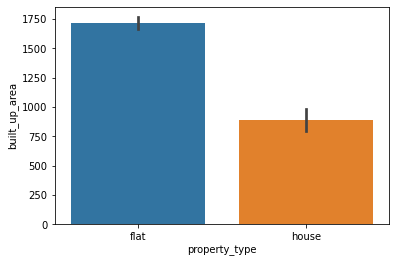

In [148]:
 sns.barplot(x=df.property_type,y=df.built_up_area) 

<AxesSubplot:xlabel='property_type', ylabel='built_up_area'>

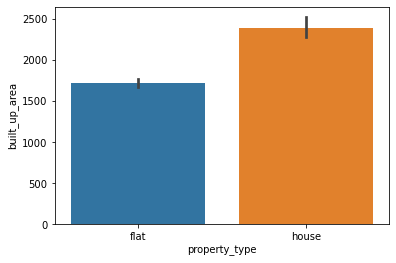

In [236]:
sns.barplot(x=df.property_type,y=df.built_up_area) 

<AxesSubplot:xlabel='property_type', ylabel='built_up_area'>

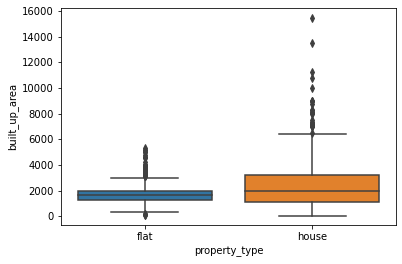

In [235]:
sns.boxplot(x=df.property_type,y=df.built_up_area) 

In [218]:
df.drop(1877,axis=0,inplace=True)

In [220]:
df.loc[2057,"built_up_area"]=4510
df.loc[2109,"built_up_area"]=1940
df.loc[3133,"built_up_area"]=1940

In [338]:
df.loc[[2057,2109,3133]]

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
2057,house,independent,sector 26,18.4,98978.0,1859.0,plot area 502(419.74 sq.m.)carpet area: 11000 sq.yards (9197.4 sq.m.),6.0,8.0,3+,4.0,South,relatively new,NaN,4510.0,11000.0,1.0,1.0,1.0,0.0,0.0,1.0,60.0
2109,house,independent,sector 43,5.5,20250.0,2716.0,plot area 215(179.77 sq.m.)built up area: 2850 sq.yards (2382.96 sq.m.)carpet area: 2250 sq.yard...,8.0,7.0,3+,3.0,East,moderately old,NaN,1940.0,2250.0,1.0,1.0,0.0,1.0,1.0,1.0,147.0
3133,house,independent,sector 25,7.3,46795.0,1560.0,plot area 215(179.77 sq.m.)built up area: 5800 sq.yards (4849.54 sq.m.)carpet area: 5200 sq.yard...,9.0,9.0,2,3.0,North-West,relatively new,NaN,1940.0,5200.0,1.0,0.0,1.0,0.0,0.0,1.0,133.0


In [156]:
df[df.property_type=='house'].built_up_area.mean()

886.230626566416

In [223]:
df.built_up_area.describe()

count     1677.000000
mean      2038.047567
std       1420.105602
min         50.000000
25%       1215.000000
50%       1735.000000
75%       2456.000000
max      15479.000000
Name: built_up_area, dtype: float64

<AxesSubplot:xlabel='property_type', ylabel='price_per_sqft'>

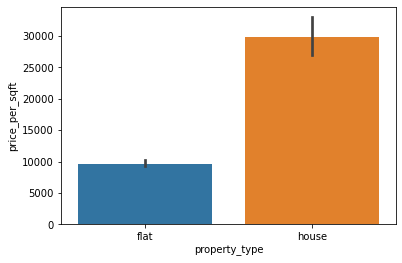

In [234]:
sns.barplot(x=df.property_type,y=df.price_per_sqft) 

<AxesSubplot:xlabel='property_type', ylabel='price_per_sqft'>

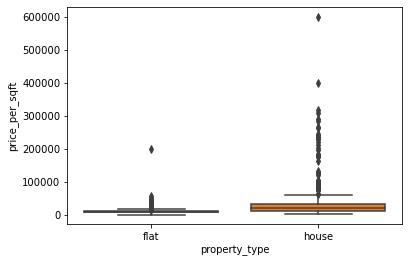

In [246]:
sns.boxplot(x=df.property_type,y=df.price_per_sqft) 

In [254]:
df[df.property_type=='house'].price_per_sqft.quantile(.90)

42038.6

In [170]:
hos#.built_up_area=hos.area
df.update(hos)

<AxesSubplot:xlabel='bedRoom', ylabel='property_type'>

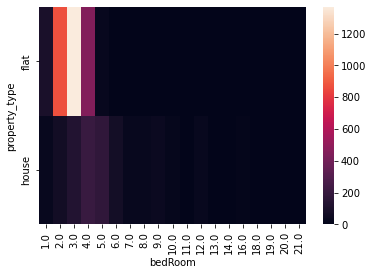

In [264]:
sns.heatmap(pd.crosstab(df.property_type,df.bedRoom))

<AxesSubplot:xlabel='property_type', ylabel='floorNum'>

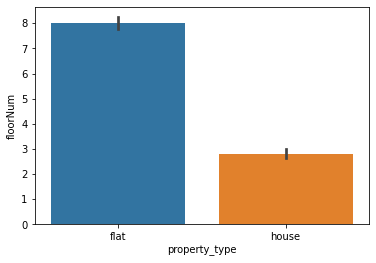

In [265]:
sns.barplot(x=df['property_type'],y=df['floorNum'])

<AxesSubplot:xlabel='property_type', ylabel='floorNum'>

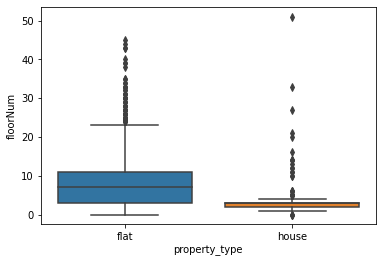

In [266]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])

<AxesSubplot:xlabel='agePossession', ylabel='property_type'>

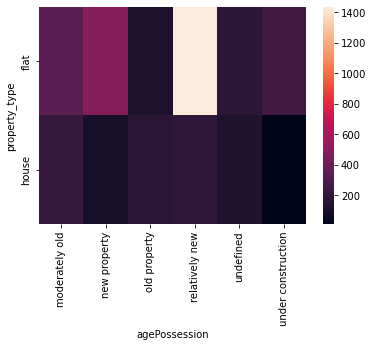

In [267]:
sns.heatmap(pd.crosstab(df['property_type'],df['agePossession']))

<AxesSubplot:xlabel='agePossession', ylabel='property_type'>

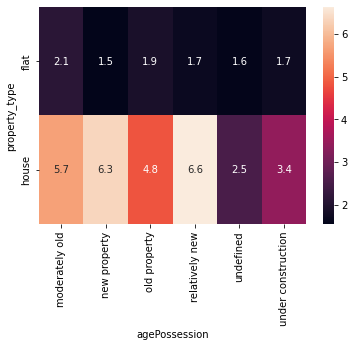

In [274]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns=df.agePossession,values='price',aggfunc='mean'),annot=True)

<AxesSubplot:xlabel='bedRoom', ylabel='property_type'>

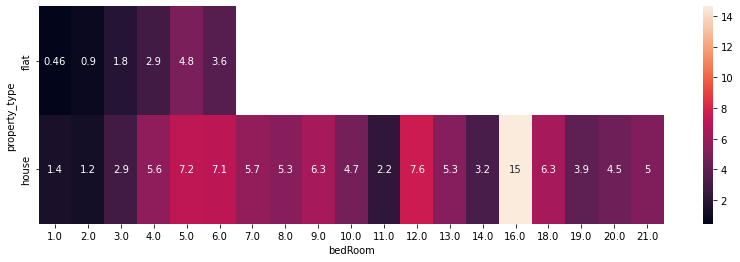

In [278]:
plt.figure(figsize=(14,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)

In [286]:
pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price')

furnishing_type,0.0,1.0,2.0
property_type,,,
flat,1.520322,2.060825,2.523103
house,3.835061,7.344486,7.473036


<AxesSubplot:xlabel='furnishing_type', ylabel='property_type'>

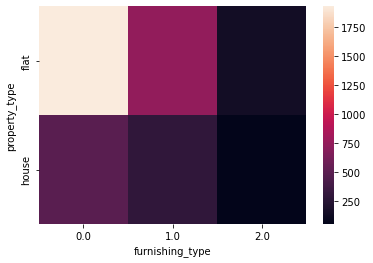

In [295]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))

<AxesSubplot:xlabel='furnishing_type', ylabel='property_type'>

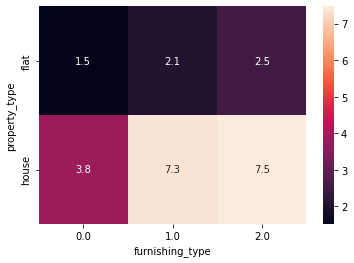

In [296]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)

<AxesSubplot:xlabel='property_type', ylabel='luxury_score'>

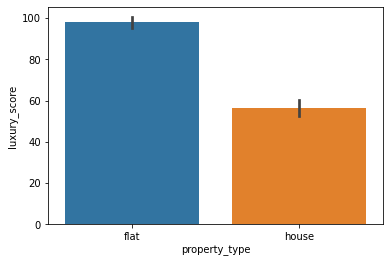

In [297]:
sns.barplot(x=df['property_type'],y=df['luxury_score'])

<AxesSubplot:xlabel='property_type', ylabel='luxury_score'>

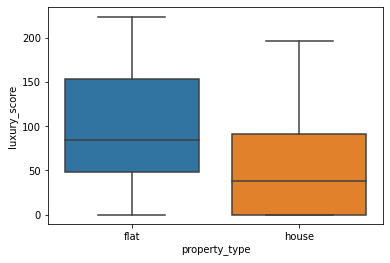

In [298]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'])

<AxesSubplot:xlabel='sector', ylabel='property_type'>

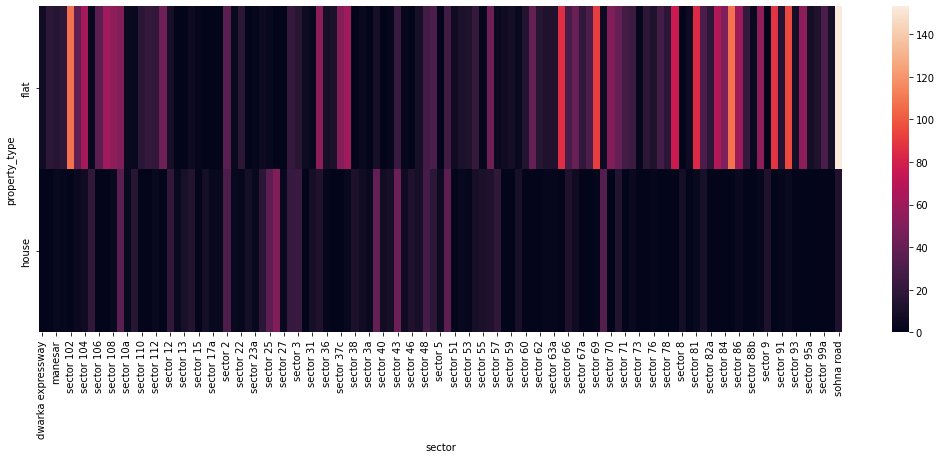

In [300]:
plt.figure(figsize=(18,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))

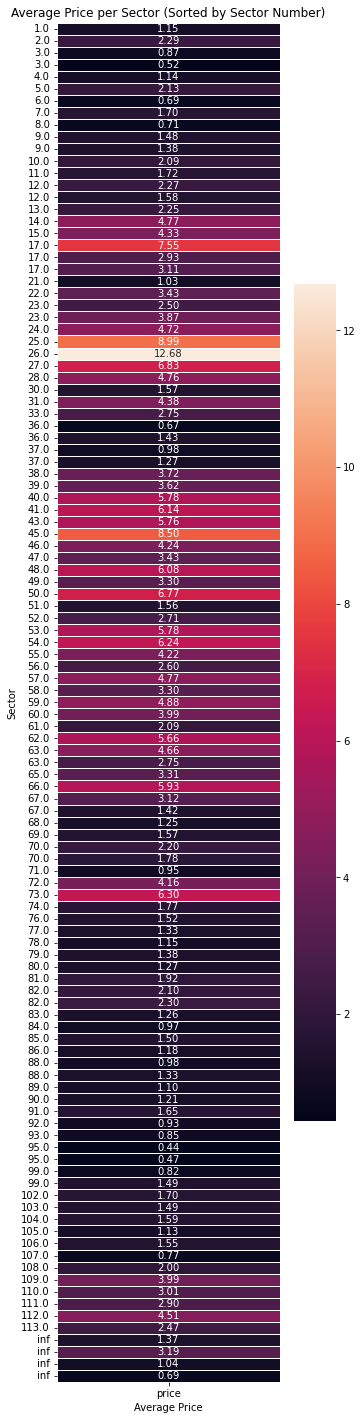

In [318]:
avg_price_sector=df.groupby('sector')['price'].mean().reset_index()

def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')

avg_price_sector['sector_number']=avg_price_sector.sector.apply(extract_sector_number)

avg_price_sector=avg_price_sector.sort_values(by='sector_number')

plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_sector.set_index('sector_number')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

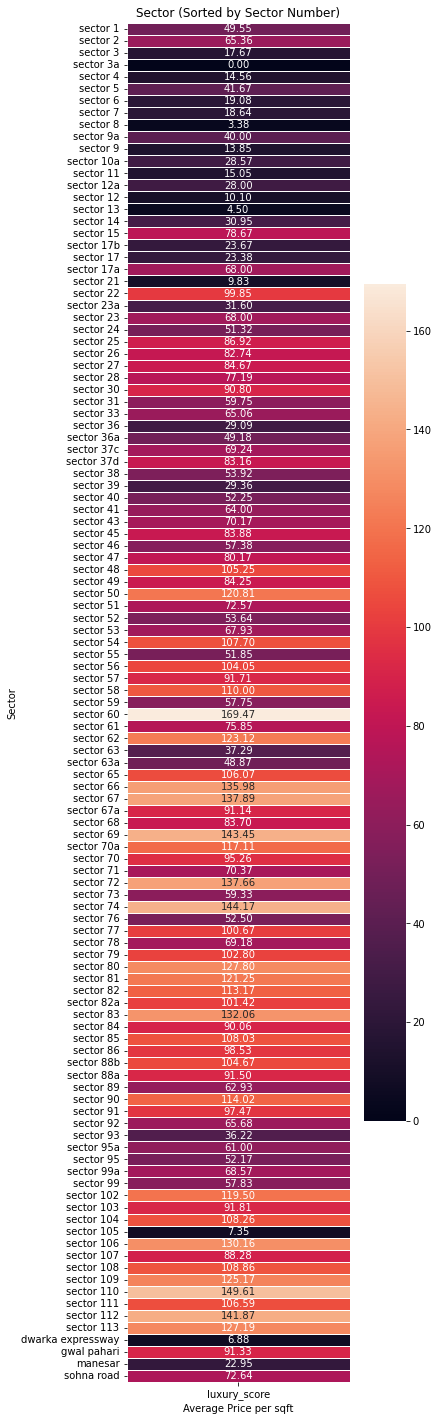

In [319]:
luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area', ylabel='price'>

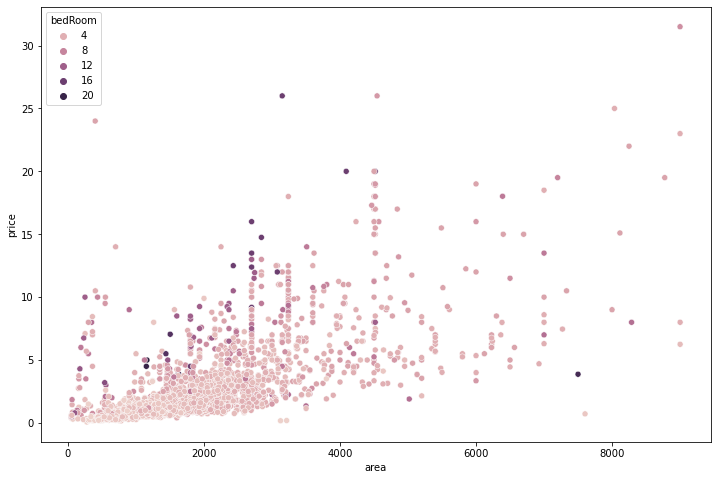

In [320]:
plt.figure(figsize=(12,8))
sns.scatterplot(df[df['area']<10000]['area'],df['price'],hue=df['bedRoom'])

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area', ylabel='price'>

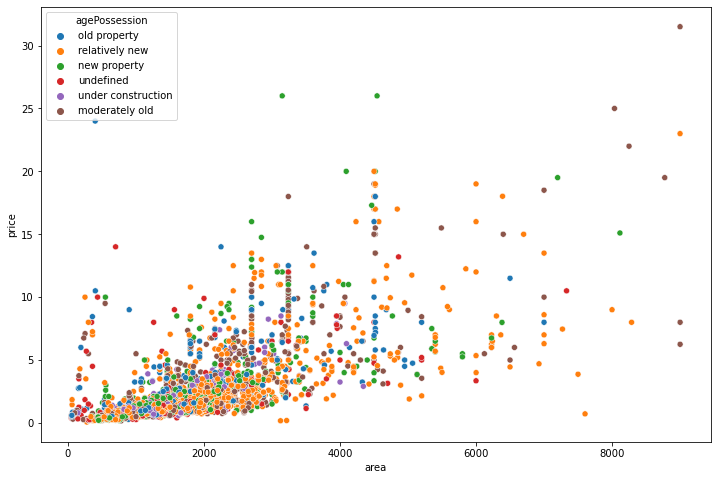

In [321]:

plt.figure(figsize=(12,8))
sns.scatterplot(df[df['area']<10000]['area'],df['price'],hue=df['agePossession'])

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area', ylabel='price'>

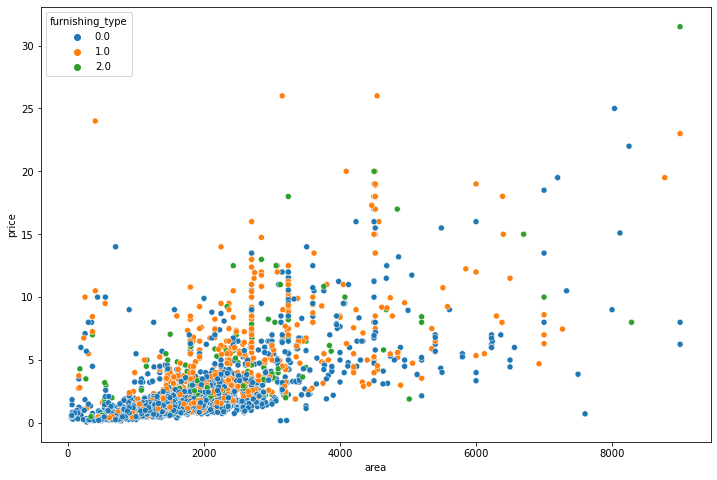

In [322]:
plt.figure(figsize=(12,8))
sns.scatterplot(df[df['area']<10000]['area'],df['price'],hue=df['furnishing_type'].astype('category'))

<AxesSubplot:xlabel='bedRoom', ylabel='price'>

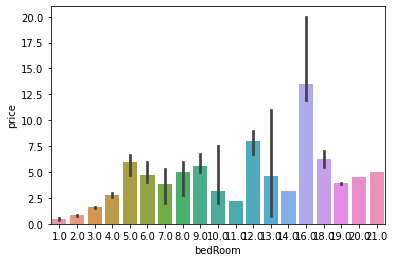

In [323]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median)

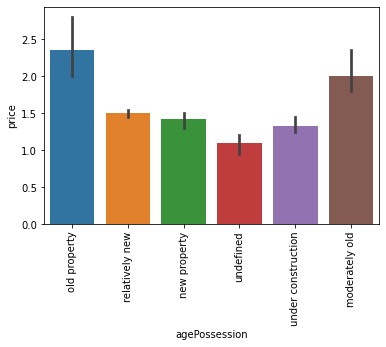

In [324]:
sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

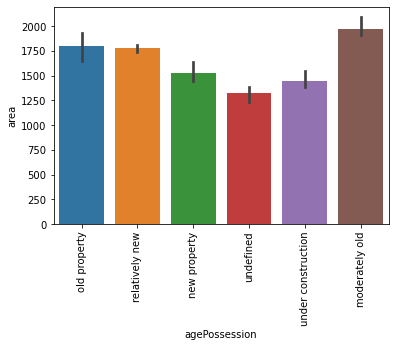

In [325]:
sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<AxesSubplot:xlabel='furnishing_type', ylabel='price'>

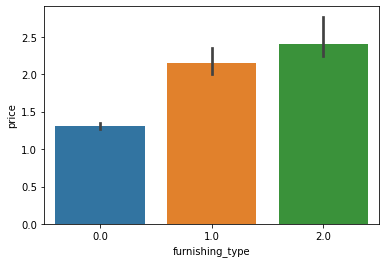

In [326]:
sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='luxury_score', ylabel='price'>

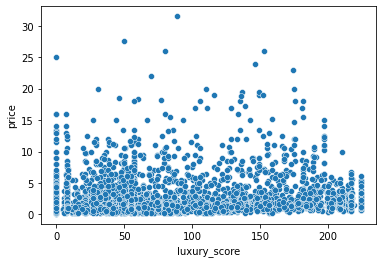

In [327]:

sns.scatterplot(df['luxury_score'],df['price'])

<AxesSubplot:>

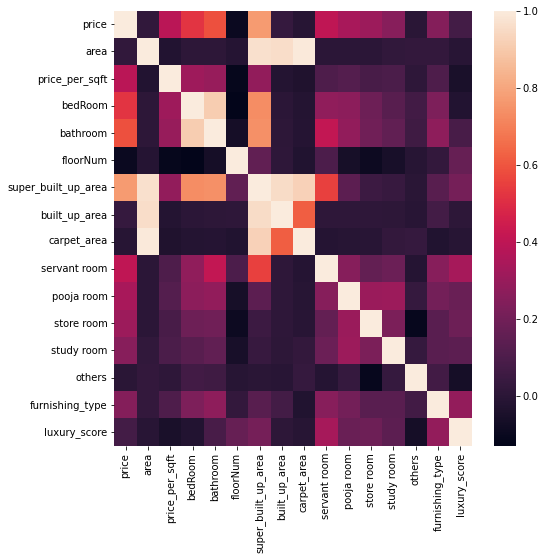

In [328]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [348]:
df.corr()['price'].sort_values(ascending=False)

price                  1.000000
super_built_up_area    0.769355
built_up_area          0.689022
bathroom               0.589719
bedRoom                0.523300
servant room           0.400504
price_per_sqft         0.390992
pooja room             0.341813
store room             0.308863
study room             0.257914
furnishing_type        0.249621
luxury_score           0.073017
area                   0.034700
others                -0.003556
carpet_area           -0.011497
floorNum              -0.095523
Name: price, dtype: float64

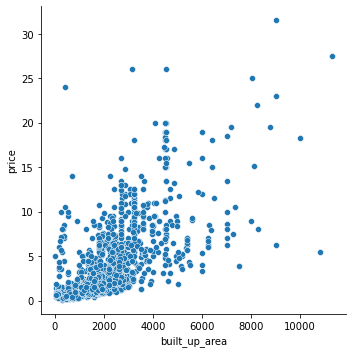

In [347]:
sns.relplot(x=df.built_up_area,y=df.price)

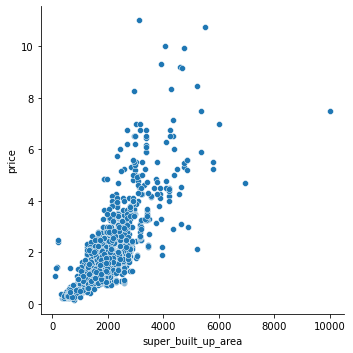

In [355]:
sns.relplot(x=df.super_built_up_area,y=df.price)

In [346]:
df[df.built_up_area>13000]

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score


In [343]:
df.loc[1343,'built_up_area']=4500

In [345]:
df=df.drop(2482,axis=0)

In [383]:
sns.pairplot(df).

SyntaxError: invalid syntax (2487737821.py, line 1)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

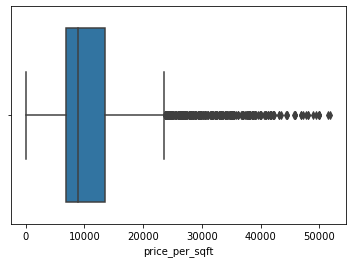

In [9]:
sns.boxplot(df.price_per_sqft)

In [410]:
Q1 = df.price_per_sqft.quantile(.25)
Q3 = df.price_per_sqft.quantile(.75)
IQR = Q2-Q1

lower_limit = Q1-1.5*IQR
upper_limit = Q3+1.5*IQR
print(lower_limit,upper_limit)
sqftarea#=df[(df.price_per_sqft>60000)]#.shape

-3807.875 24258.125


,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
134,house,independent,sector 12,6.00,190.0,315789.0,plot area 190(17.65 sq.m.)carpet area: 1600 sq.ft. (148.64 sq.m.),9.0,6.0,2,2.0,North-East,old property,NaN,1600.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
149,house,eros rosewood villas,sector 49,2.75,154.0,178571.0,plot area 154(14.31 sq.m.)carpet area: 1650 sq.ft. (153.29 sq.m.),3.0,3.0,1,2.0,North-West,old property,NaN,1650.0,1650.0,0.0,0.0,0.0,0.0,1.0,1.0,104.0
989,house,vatika india next,sector 82,7.00,360.0,194444.0,plot area 360(33.45 sq.m.)built up area: 3900 sq.ft. (362.32 sq.m.)carpet area: 3743 sq.ft. (347...,4.0,4.0,3+,3.0,North-East,relatively new,NaN,3900.0,3743.0,1.0,0.0,0.0,0.0,0.0,2.0,136.0
1251,house,project housing board colony,sector 31,8.00,1260.0,63492.0,built up area: 140 (117.06 sq.m.),2.0,1.0,0,1.0,NaN,undefined,NaN,1260.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1757,house,emaar the palm springs,sector 54,14.00,2250.0,62222.0,plot area 250(209.03 sq.m.),4.0,5.0,3+,2.0,North,old property,NaN,2250.0,NaN,1.0,0.0,0.0,1.0,0.0,1.0,197.0
2208,house,independent,sector 26,26.00,3150.0,82540.0,plot area 402(336.12 sq.m.)built up area: 400 sq.yards (334.45 sq.m.)carpet area: 350 sq.yards (...,16.0,16.0,3+,4.0,North-West,new property,NaN,3600.0,350.0,1.0,1.0,1.0,1.0,0.0,1.0,80.0
2545,house,independent,sector 12a,3.50,263.0,133079.0,plot area 263(24.43 sq.m.)built up area: 4800 sq.ft. (445.93 sq.m.)carpet area: 4400 sq.ft. (408...,8.0,8.0,3+,3.0,South-East,relatively new,NaN,4800.0,4400.0,1.0,1.0,0.0,1.0,0.0,2.0,84.0
2554,house,independent,sector 12,1.00,135.0,74074.0,plot area 135(12.54 sq.m.)built up area: 3750 sq.ft. (348.39 sq.m.),9.0,7.0,3+,3.0,North,moderately old,NaN,3750.0,NaN,0.0,1.0,1.0,0.0,0.0,0.0,14.0


In [420]:
sqftarea.price_per_sqft=sqftarea.price*10000000/sqftarea.built_up_area   #

134     37500.000000
149     16666.666667
989     17948.717949
1251    63492.063492
1757    62222.222222
2208    72222.222222
2545     7291.666667
2554     2666.666667
dtype: float64

In [413]:
df.update(sqftarea)

In [391]:
df.drop([3536,3434,3351,3317,3289,3158,3120,2899,2812,2759,2548,2129,1935,1920,1750,1420,1240,1082,949,869,850,736,443,420,209,112],axis=0,inplace=True)

In [408]:
df.loc[2208,'built_up_area']=3600

In [95]:
df=df[~(df.area>12000)]

In [71]:
df=df[~(df.price_per_sqft>52000)]#.shape

In [80]:
df.loc[2518,['area','built_up_area']]=4800.0

In [37]:
df.area.describe()

count     3572.000000
mean      1913.398096
std       1165.116194
min         96.000000
25%       1250.000000
50%       1741.000000
75%       2298.000000
max      11286.000000
Name: area, dtype: float64

In [76]:
df.area.describe()#new

count     3548.000000
mean      2070.652480
std       3177.869588
min         72.000000
25%       1250.000000
50%       1735.000000
75%       2298.000000
max      82781.000000
Name: area, dtype: float64

In [86]:
df.loc[148,['area','built_up_area']]=1650.0

In [87]:
df[df.area<200]
#df.drop([2232,2272],axis=0,inplace=True)

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
833,house,independent,sector 13,0.62,192.0,32291.0,built up area: 192 (17.84 sq.m.),6.0,6.0,0,3.0,NaN,undefined,NaN,192.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

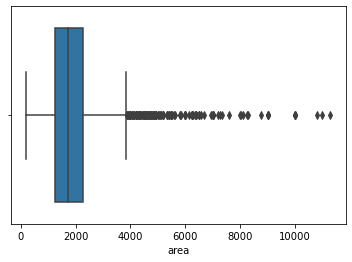

In [97]:
sns.boxplot(df.area)  #[df.area<1000]

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='area', ylabel='Density'>

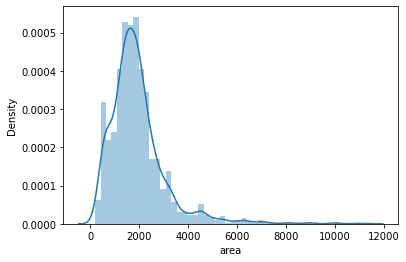

In [96]:
sns.distplot(df.area)

In [65]:
df=df[~(df.bedRoom>10)]#.shape

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bedRoom', ylabel='Density'>

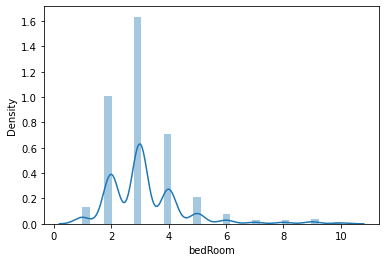

In [103]:
sns.distplot(df.bedRoom)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bathroom', ylabel='Density'>

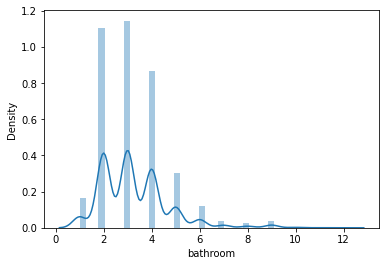

In [104]:
sns.distplot(df.bathroom)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedRoom'>

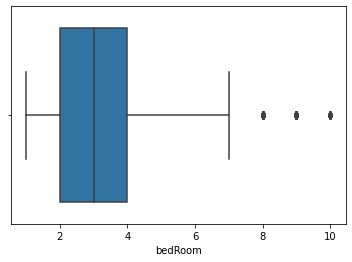

In [100]:
sns.boxplot(df.bedRoom)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bathroom'>

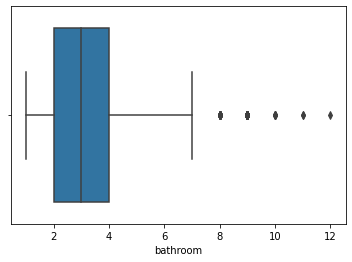

In [108]:
sns.boxplot(df.bathroom)

In [110]:
df[df.super_built_up_area>6000]

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
1387,flat,krrish provence estate,gwal pahari,7.5,10000.0,7500.0,Super Built up area 10000(929.03 sq.m.),5.0,6.0,3+,23.0,North-East,relatively new,10000.0,NaN,NaN,1.0,1.0,0.0,0.0,1.0,0.0,55.0
2126,flat,bestech park view grand spa,sector 81,4.7,6926.0,6786.0,Super Built up area 6926(643.45 sq.m.),4.0,4.0,3+,19.0,North,relatively new,6926.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,192.0


C:\Users\mayan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carpet_area', ylabel='Density'>

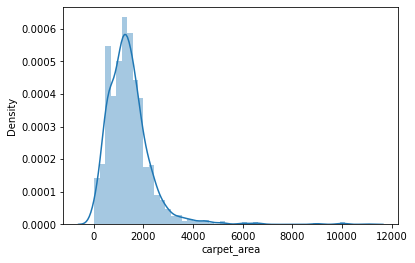

In [114]:
sns.distplot(df.carpet_area)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_per_sqft'>

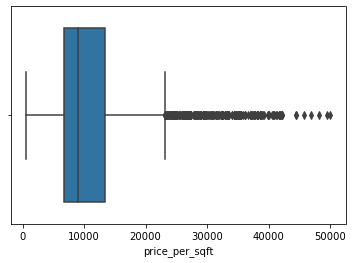

In [164]:
sns.boxplot(df.price_per_sqft)

In [116]:
df[df.carpet_area>10000]

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
3336,flat,m3m golfestate,sector 65,13.2,11000.0,12000.0,Carpet area: 11000 (1021.93 sq.m.),4.0,4.0,3,13.0,North,moderately old,NaN,NaN,11000.0,1.0,0.0,0.0,0.0,0.0,0.0,82.0


In [167]:
x=df[df.price_per_sqft<=20000]

In [174]:
(x.area/x.bedRoom).quantile(0.02)

198.808

In [178]:
df[(df.area/df.bedRoom)<198]

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
22,house,independent,sector 38,2.10,900.0,23333.0,plot area 100(83.61 sq.m.),7.0,7.0,3+,3.0,North-East,relatively new,NaN,900.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,27.0
105,house,independent,sector 51,2.25,900.0,25000.0,plot area 100(83.61 sq.m.),6.0,3.0,3+,3.0,North-West,relatively new,NaN,900.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,61.0
131,house,independent,sector 12,6.00,1600.0,37500.0,plot area 190(17.65 sq.m.)carpet area: 1600 sq.ft. (148.64 sq.m.),9.0,6.0,2,2.0,North-East,old property,NaN,1600.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
171,house,independent,sector 105,0.60,450.0,13333.0,built up area: 450 (41.81 sq.m.),3.0,3.0,0,3.0,NaN,undefined,NaN,450.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
201,house,rajendra park gurgaon,sector 105,0.37,360.0,10277.0,plot area 360(33.45 sq.m.),4.0,3.0,2,3.0,East,relatively new,NaN,360.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
363,house,row house,sector 105,0.43,471.0,9135.0,plot area 52(43.48 sq.m.)built up area: 1050 sq.yards (877.93 sq.m.),3.0,3.0,3,2.0,NaN,relatively new,NaN,471.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
370,house,independent,sector 41,4.25,1620.0,26235.0,plot area 180(150.5 sq.m.),10.0,9.0,3+,4.0,North,moderately old,NaN,1620.0,NaN,1.0,0.0,0.0,1.0,0.0,1.0,51.0
460,house,independent,sector 3,0.80,981.0,8155.0,plot area 109(91.14 sq.m.),5.0,4.0,1,2.0,NaN,moderately old,NaN,981.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
556,house,rattan garden,sector 7,1.30,963.0,13499.0,built up area: 963 (89.47 sq.m.),5.0,3.0,2,3.0,NaN,old property,NaN,963.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,house,independent,sector 9,1.25,1431.0,8735.0,plot area 159(132.94 sq.m.),10.0,6.0,3+,3.0,NaN,old property,NaN,1431.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
xx=round(df.price*10000000/df.area)

In [163]:
for i,j in zip(df.price_per_sqft,xx):
    if j-i>100:
        print(i,'-------',j)

In [151]:
df[df.price_per_sqft==1560.0]

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score
3033,house,independent,sector 25,7.3,1940.0,1560.0,plot area 215(179.77 sq.m.)built up area: 5800 sq.yards (4849.54 sq.m.)carpet area: 5200 sq.yard...,9.0,9.0,2,3.0,North-West,relatively new,NaN,1940.0,5200.0,1.0,0.0,1.0,0.0,0.0,1.0,133.0


In [156]:
df.drop(3033,axis=0,inplace=True)

In [193]:
df=df[df.area/df.bedRoom>=95]#.shape

In [16]:
outdf=df[(df.area_room_ratio<250) &(df.bedRoom>3)]

In [17]:
outdf.bedRoom=round(outdf.bedRoom/outdf.floorNum)

C:\Users\mayan\AppData\Local\Temp\ipykernel_2764\3807121973.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outdf.bedRoom=round(outdf.bedRoom/outdf.floorNum)


In [20]:
outdf

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score,area_room_ratio
22,house,independent,sector 38,2.10,900.0,23333.0,plot area 100(83.61 sq.m.),2.0,7.0,3+,3.0,North-East,relatively new,NaN,900.0,NaN,0.0,1.0,1.0,1.0,0.0,0.0,27.0,128.571429
24,house,independent,sector 46,2.25,918.0,24510.0,plot area 102(85.28 sq.m.)built up area: 90 sq.yards (75.25 sq.m.)carpet area: 85 sq.yards (71.0...,1.0,3.0,3,3.0,North-East,relatively new,NaN,918.0,85.0,0.0,0.0,0.0,1.0,0.0,1.0,60.0,229.500000
105,house,independent,sector 51,2.25,900.0,25000.0,plot area 100(83.61 sq.m.),2.0,3.0,3+,3.0,North-West,relatively new,NaN,900.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,61.0,150.000000
119,house,independent,sector 25,7.60,1961.0,38760.0,plot area 215(179.77 sq.m.),2.0,9.0,3,4.0,East,relatively new,NaN,1961.0,NaN,0.0,1.0,1.0,1.0,0.0,1.0,100.0,217.888889
131,house,independent,sector 12,6.00,1600.0,37500.0,plot area 190(17.65 sq.m.)carpet area: 1600 sq.ft. (148.64 sq.m.),4.0,6.0,2,2.0,North-East,old property,NaN,1600.0,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,177.777778
238,house,independent,sector 47,5.15,1935.0,26615.0,plot area 215(179.77 sq.m.),3.0,9.0,3+,3.0,East,relatively new,NaN,1935.0,NaN,0.0,0.0,1.0,0.0,0.0,1.0,83.0,215.000000
369,house,independent,sector 41,4.25,1620.0,26235.0,plot area 180(150.5 sq.m.),2.0,9.0,3+,4.0,North,moderately old,NaN,1620.0,NaN,1.0,0.0,0.0,1.0,0.0,1.0,51.0,162.000000
441,house,shivpuri,sector 7,2.80,2250.0,12444.0,plot area 2250(209.03 sq.m.),10.0,7.0,3,1.0,NaN,old property,NaN,2250.0,NaN,1.0,1.0,0.0,1.0,1.0,1.0,0.0,225.000000
459,house,independent,sector 3,0.80,981.0,8155.0,plot area 109(91.14 sq.m.),2.0,4.0,1,2.0,NaN,moderately old,NaN,981.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,196.200000
555,house,rattan garden,sector 7,1.30,963.0,13499.0,built up area: 963 (89.47 sq.m.),2.0,3.0,2,3.0,NaN,old property,NaN,963.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,192.600000


In [21]:
df.update(outdf)

In [26]:
df=df[~((df.area_room_ratio<250) &(df.bedRoom>4))]

In [7]:
outdf.floorNum.value_counts()

3.0    38
2.0    20
4.0    15
1.0    15
5.0     1
Name: floorNum, dtype: int64

In [199]:
df['area_room_ratio']=df.area/df.bedRoom

C:\Users\mayan\AppData\Local\Temp\ipykernel_12908\1400396995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_room_ratio']=df.area/df.bedRoom


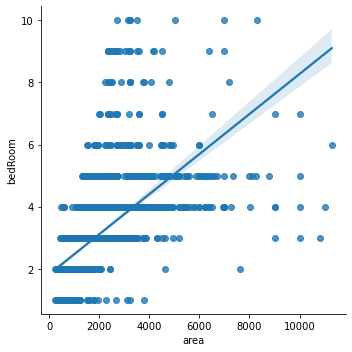

In [27]:
sns.lmplot(data=df,x='area',y='bedRoom')

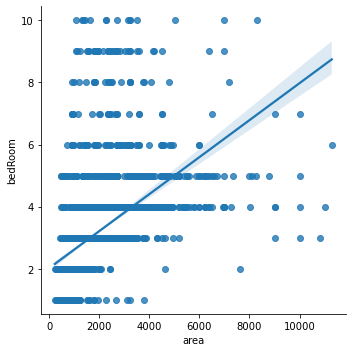

In [195]:
sns.lmplot(data=df,x='area',y='bedRoom')

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area', ylabel='carpet_area'>

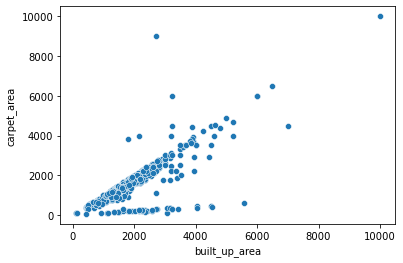

In [31]:
sns.scatterplot(df.built_up_area,df.carpet_area)

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area', ylabel='carpet_area'>

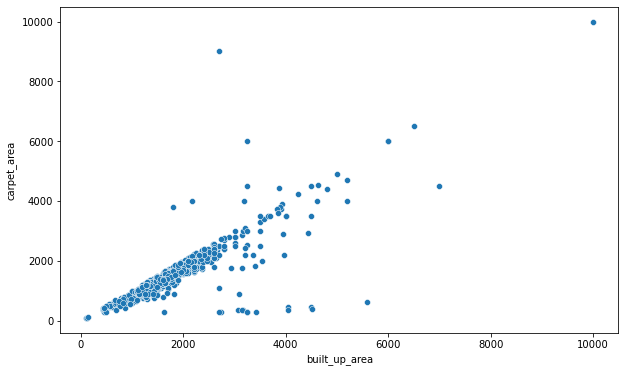

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.built_up_area,df.carpet_area)

In [54]:
carpet=df[(df.built_up_area>300)&(df.carpet_area<250)]#.shape#[['area','areawithtype','built_up_area','carpet_area']]

In [62]:
carpet.carpet_area=carpet.carpet_area*10.7639

C:\Users\mayan\AppData\Local\Temp\ipykernel_19592\4178635799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carpet.carpet_area=carpet.carpet_area*10.7639


In [23]:
import re
def carpet_val (text):
    match = re.findall(r'\d+\.?\d+',text)
    if match:
        return float(match[-1])
    return None  

In [55]:
carpet_area= carpet.areawithtype.apply(carpet_val)

In [63]:
df.update(carpet)

In [7]:
df.areawithtype=df['areawithtype'].str.replace('(','')
df.areawithtype=df['areawithtype'].str.replace(')','')

C:\Users\mayan\AppData\Local\Temp\ipykernel_19592\2205029661.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.areawithtype=df['areawithtype'].str.replace('(','')
C:\Users\mayan\AppData\Local\Temp\ipykernel_19592\2205029661.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.areawithtype=df['areawithtype'].str.replace(')','')


In [67]:
df[(df.built_up_area.isna())&(df.carpet_area.isna())&(df.super_built_up_area.isna())]

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score,area_room_ratio


In [73]:
all_df=df[~((df.built_up_area.isna())|(df.carpet_area.isna())|(df.super_built_up_area.isna()))]

In [81]:
(all_df.super_built_up_area/all_df.built_up_area).median()

1.105263157894737

In [79]:
(all_df.carpet_area/all_df.built_up_area).median()

0.9

In [24]:
2400/1.1052
#2050/0.9

2171.5526601520087

In [25]:
(2171+2277)/2

2224.0

In [72]:
sbc_df=df[~(df.super_built_up_area.isna())&(df.built_up_area.isna())&~(df.carpet_area.isna())]

In [73]:
sbc_df.built_up_area=round((((sbc_df.super_built_up_area/1.105)+(sbc_df.carpet_area/.9))/2))

C:\Users\mayan\AppData\Local\Temp\ipykernel_2596\3422005271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbc_df.built_up_area=round((((sbc_df.super_built_up_area/1.105)+(sbc_df.carpet_area/.9))/2))


In [74]:
df.update(sbc_df)

In [75]:
sb_df=df[~(df.super_built_up_area.isna())&(df.built_up_area.isna())&(df.carpet_area.isna())]

In [76]:
sb_df.built_up_area=round((sb_df.super_built_up_area/1.105))

C:\Users\mayan\AppData\Local\Temp\ipykernel_2596\3423962959.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df.built_up_area=round((sb_df.super_built_up_area/1.105))


In [77]:
df.update(sb_df)

In [78]:
s_df=df[(df.super_built_up_area.isna())&(df.built_up_area.isna())&~(df.carpet_area.isna())]
s_df.head(5)

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score,area_room_ratio
2,flat,smart world orchard,sector 61,2.20,1549.0,14202.0,Carpet area: 1549 143.91 sq.m.,3.0,3.0,2,4.0,North,new property,NaN,NaN,1549.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,516.333333
3,house,independent,sector 2,5.00,3250.0,15384.0,Carpet area: 3250 301.93 sq.m.,6.0,6.0,2,1.0,South,undefined,NaN,NaN,3250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541.666667
20,flat,microtek greenburg,sector 86,1.30,850.0,15294.0,Carpet area: 850 78.97 sq.m.,2.0,3.0,3,5.0,North-East,relatively new,NaN,NaN,850.0,0.0,0.0,0.0,1.0,0.0,1.0,67.0,425.000000
34,flat,dlf regal gardens,sector 90,1.79,2215.0,8081.0,Carpet area: 2215 205.78 sq.m.,4.0,3.0,3+,10.0,North-East,moderately old,NaN,NaN,2215.0,0.0,0.0,0.0,0.0,0.0,0.0,85.0,553.750000
36,flat,signature global park 4,sector 36,1.00,1010.0,9900.0,Carpet area: 1010 93.83 sq.m.,3.0,2.0,3,2.0,NaN,new property,NaN,NaN,1010.0,0.0,0.0,0.0,0.0,0.0,0.0,165.0,336.666667


In [79]:
s_df.built_up_area=round((s_df.carpet_area/.9))

C:\Users\mayan\AppData\Local\Temp\ipykernel_2596\1885507453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_df.built_up_area=round((s_df.carpet_area/.9))


In [80]:
df.update(s_df)

In [107]:
df.isna().sum()

property_type             0
society                   0
sector                    0
price                     0
area                      0
price_per_sqft            0
areawithtype              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  0
facing                  982
agePossession             0
super_built_up_area    1621
built_up_area             0
carpet_area            1674
servant room              0
pooja room                0
store room                0
study room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

C:\Users\mayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='built_up_area', ylabel='price'>

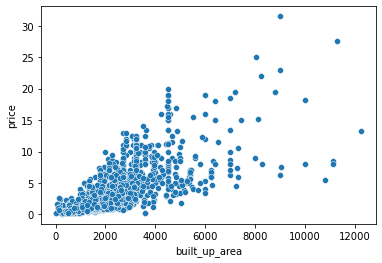

In [85]:
sns.scatterplot(df.built_up_area,df.price)

In [97]:
anomly=df[(df.built_up_area<1000)&(df.price>3)]
anomly.

SyntaxError: invalid syntax (2049875042.py, line 2)

In [83]:
anomly.built_up_area=anomly.area

C:\Users\mayan\AppData\Local\Temp\ipykernel_2596\669509763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anomly.built_up_area=anomly.area


In [84]:
anomly
df.update(anomly)

In [159]:
df_new=df.drop(columns=['area','areawithtype','super_built_up_area','carpet_area','area_room_ratio','facing'])

In [94]:
df[(df.property_type=='house')].floorNum.median()

2.0

In [106]:
df.floorNum.fillna(2.0,inplace=True) #value_counts()

In [103]:
df[df.society.isna()]

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score,area_room_ratio
1850,flat,NaN,sector 78,0.6,1625.0,3692.0,built up area: 1625 150.97 sq.m.,2.0,2.0,0,NaN,NaN,under construction,NaN,1625.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,812.5


In [104]:
df.drop(index=1850,inplace=True)

In [109]:
df.agePossession.value_counts()

relatively new        1597
new property           551
moderately old         532
old property           281
undefined              274
under construction     259
Name: agePossession, dtype: int64

In [158]:
df.agePossession.value_counts()

relatively new        1727
moderately old         609
new property           579
old property           304
under construction     275
Name: agePossession, dtype: int64

In [149]:
def age(row):
    if row['agePossession']=='undefined':
        mode_value = df[(df.sector==row.sector)]['agePossession'].mode()
        
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [154]:
def pro(row):
    if row['agePossession']=='undefined':
        mode_value = df[(df.property_type==row.property_type)]['agePossession'].mode()
        
        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [157]:
df.agePossession=df.apply(pro,axis=1)

In [151]:
df.agePossession=df.apply(age,axis=1)

In [153]:
df.head()

,property_type,society,sector,price,area,price_per_sqft,areawithtype,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,servant room,pooja room,store room,study room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,apna enclave,sector 3,0.55,950.0,5789.0,super built up area 95088.26 sq.m.built up area: 900 sq.ft. 83.61 sq.m.carpet area: 744 sq.ft. 69.12 sq.m.,2.0,2.0,2,2.0,North-East,old property,950.0,900.0,744.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,475.000000
1,flat,ats tourmaline,sector 109,1.75,2150.0,8139.0,Super Built up area 2150199.74 sq.m.,3.0,4.0,3+,9.0,North-East,relatively new,2150.0,1946.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,131.0,716.666667
2,flat,smart world orchard,sector 61,2.20,1549.0,14202.0,Carpet area: 1549 143.91 sq.m.,3.0,3.0,2,4.0,North,new property,NaN,1721.0,1549.0,0.0,0.0,0.0,0.0,0.0,0.0,180.0,516.333333
3,house,independent,sector 2,5.00,3250.0,15384.0,Carpet area: 3250 301.93 sq.m.,6.0,6.0,2,1.0,South,moderately old,NaN,3611.0,3250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,541.666667
4,flat,signature global city 63a,sector 63a,1.65,1081.0,15263.0,Super Built up area 1081100.43 sq.m.,2.0,2.0,2,1.0,NaN,under construction,1081.0,978.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540.500000


In [113]:
df.sector.value_counts().sort_index()

dwarka expressway      8
gwal pahari           18
manesar               17
sector 1              20
sector 102           107
sector 103            42
sector 104            66
sector 105            17
sector 106            38
sector 107            59
sector 108            58
sector 109            86
sector 10a             7
sector 11             16
sector 110            18
sector 111            22
sector 112            23
sector 113            43
sector 12             25
sector 12a             4
sector 13              6
sector 14             18
sector 15              3
sector 17              5
sector 17a             1
sector 17b             3
sector 2              66
sector 21              6
sector 22             20
sector 23              7
sector 23a             5
sector 24             16
sector 25             35
sector 26             40
sector 27              2
sector 28             37
sector 3              33
sector 30              5
sector 31             10
sector 33             65


In [133]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=4, weights="uniform")

# Fit and transform the dataset to impute missing values
imputed_data = imputer.fit_transform(df_new)


ValueError: could not convert string to float: 'flat'

In [128]:
df_new.loc[df_new.agePossession == 'undefined', 'agePossession'] = np.nan

In [129]:
df_new.agePossession.value_counts()

relatively new        1597
new property           551
moderately old         532
old property           281
under construction     259
Name: agePossession, dtype: int64

In [161]:
df_new.isna().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
servant room       0
pooja room         0
store room         0
study room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [134]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 0 to 3494
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3494 non-null   object 
 1   society          3494 non-null   object 
 2   sector           3494 non-null   object 
 3   price            3494 non-null   float64
 4   price_per_sqft   3494 non-null   float64
 5   bedRoom          3494 non-null   float64
 6   bathroom         3494 non-null   float64
 7   balcony          3494 non-null   object 
 8   floorNum         3494 non-null   float64
 9   agePossession    3220 non-null   object 
 10  built_up_area    3494 non-null   float64
 11  servant room     3494 non-null   float64
 12  pooja room       3494 non-null   float64
 13  store room       3494 non-null   float64
 14  study room       3494 non-null   float64
 15  others           3494 non-null   float64
 16  furnishing_type  3494 non-null   float64
 17  luxury_score  